# Model Evaluation

#### Let's import the libraries

* When in doubt regarding which Scikit-Learn module something belongs to, refer to this <a href="http://scikit-learn.org/stable/modules/classes.html" target="_blank">documentation page</a>



In [28]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Next, let's read in the analytical base table you saved at the end of Module 2.

In [30]:
df = pd.read_csv('analytical_base_table.csv')

### Split the Dataset

**Data is a limited resource.** Let's start by splitting our data into training and testing sets. 

We can spend some of it to train your model, some of it to test, or evaluate your model.

Having a true "unseen" test dataset helps us prevent overfit models and ultimately select the best model.

In [3]:
#Target Variable
y = df.status

In [31]:
#Input features/Independant variables/Predictors
x = df.drop('status', axis=1)

### Train Test split function

* Pass in the argument **test_size=0.2** to set aside 20% of our observations for the test set.
* Pass in **random_state=123** to set the random state for replicable results. (It can be any number)
* Also pass in the argument **stratify=abt.status** in order to make sure the target variable's| classes are balanced in each subset of data! This is stratified random sampling.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 123, stratify =df.status, test_size=0.2 )

In [32]:
#verify
print(len(x_train),len(y_train),len(x_test),len(y_test))

11254 11254 2814 2814


### Data Preprocessing

Let's standardize the data (Mean = 0, std = 1) using standard scalar 

In [34]:
sc = StandardScaler()

In [35]:
#Scale the independant variables in the train set
X_train = sc.fit_transform(x_train)

In [36]:
#Scale the independant variables in the test set
X_test = sc.transform(x_test)

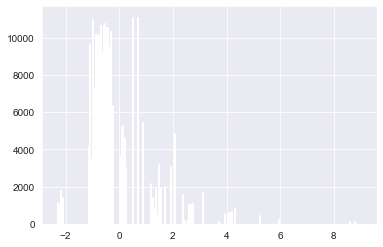

In [42]:
#visualise the scaled data using a histogram
plt.hist(X_train)
plt.show()

Here we don't have to scale the 'status' (target) variable because the values are only 0 and 1. 

## <code style="color:Green">1. Logistic Regression</code>

### A. Penalty type - L1 regularized

<code style="color:crimson">For Linear regression:

* **L1** regularization is called **Lasso regression**
* **L2** regularization is called **Ridge regression** </code>


For logistic regression, we'll simply call it L1 and L2-regularized logistic regression. By default, LogisticRegression uses the L2 penalty.

We will work out the L1 penalty first.



## Hyperparameter tuning

There are two types of parameters we need to consider when using machine learning algorithms.

* Model parameters<br>
* Hyperparamters

Model parameters are learned directly from the training data while hyperparameters are not (so we can tune them initially)

### Let's list the tunable hyperparameters for  𝐿1 regularized logistic regression algorithm.

In [46]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Remember**: We don't need to tune all the parameters. For regularized logistic regression, the most impactful hyperparameter is the strength of the penalty **'C'**

<code style="color:crimson">For Lasso, Ridge, and Elastic-Net algorithms, this is alpha.</code>

**Strength of the penalty**<br>
* C is the inverse of regularization strength.<br>
* That means higher values of C means weaker penalties.<br>
* C is a positive value, typically between 0 and 1000. The default is 1.0<br>

For **C**, let's try values between 0.001 and 1000

In [114]:
# for L1 penalty regularized Logistic Regression, use solver='liblinear' to prevent the error

for n in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    modellr1 = LogisticRegression(C=n,penalty='l1', solver='liblinear')
    modellr1.fit(X_train, y_train)
    y_pred = modellr1.predict(X_test)
    confusion_matrix(y_test,y_pred)
    print('C =',n)
    print('Accuracy score:', np.round(accuracy_score(y_test, y_pred),3))
    print(confusion_matrix(y_test, y_pred),'\n')

C = 0.001
Accuracy score: 0.789
[[2134    7]
 [ 588   85]] 

C = 0.005
Accuracy score: 0.796
[[2006  135]
 [ 440  233]] 

C = 0.01
Accuracy score: 0.812
[[1985  156]
 [ 372  301]] 

C = 0.05
Accuracy score: 0.83
[[1960  181]
 [ 296  377]] 

C = 0.1
Accuracy score: 0.838
[[1964  177]
 [ 280  393]] 

C = 0.5
Accuracy score: 0.842
[[1966  175]
 [ 270  403]] 

C = 1
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 5
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 10
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 50
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 

C = 100
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 

C = 500
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 1000
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 



    We can note that increasing penalty beyond certain point does not change the accuracy of the model.

### B. Penalty type - L2 regularized

Let's do the same for penalty L2

In [115]:
# for L2 penalty regularized Logistic Regression

for n in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    modellr2 = LogisticRegression(C=n,penalty='l2')
    modellr2.fit(X_train, y_train)
    y2_pred = modellr2.predict(X_test)
    confusion_matrix(y_test,y2_pred)
    print('C =',n)
    print('Accuracy score:', np.round(accuracy_score(y_test, y2_pred),3))
    print(confusion_matrix(y_test, y2_pred),'\n')

C = 0.001
Accuracy score: 0.781
[[2054   87]
 [ 529  144]] 

C = 0.005
Accuracy score: 0.813
[[2016  125]
 [ 402  271]] 

C = 0.01
Accuracy score: 0.819
[[1987  154]
 [ 354  319]] 

C = 0.05
Accuracy score: 0.835
[[1965  176]
 [ 289  384]] 

C = 0.1
Accuracy score: 0.838
[[1968  173]
 [ 284  389]] 

C = 0.5
Accuracy score: 0.842
[[1966  175]
 [ 270  403]] 

C = 1
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 5
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 10
Accuracy score: 0.842
[[1966  175]
 [ 269  404]] 

C = 50
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 

C = 100
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 

C = 500
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 

C = 1000
Accuracy score: 0.842
[[1965  176]
 [ 269  404]] 



    We can note that increasing penalty beyond certain point does not change the accuracy of the model.

## <code style="color:Green">2. Random Forest</code>

### Let's list the tunable hyperparameters for Random Forest algorithm.

In [59]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


For random forests,<br> 
* The first hyperparameter to tune is **n_estimators.** We will try 100 and 200.<br>
* The second one is **max_features.** Let's try - 'auto', 'sqrt', and 0.33.<br>
* The third one is **min_samples_leaf.** Let's try - 1, 3, 5, 10

In [116]:
#Let's create a loop
    
for n in [100, 200]:
     for m in ['auto', 'sqrt', 0.33]:
            for l in [1, 3, 5, 10]:
                modelrf = RandomForestClassifier(n_estimators=n, max_features=m, min_samples_leaf=l)
                modelrf.fit(X_train, y_train)
                y3_pred = modelrf.predict(X_test)  
                print('n =',n, 'm =',m , 'l =',l, 'Accuracy score:', np.round(accuracy_score(y_test, y3_pred),3))
                print(confusion_matrix(y_test, y3_pred),'\n')

n = 100 m = auto l = 1 Accuracy score: 0.974
[[2123   18]
 [  56  617]] 

n = 100 m = auto l = 3 Accuracy score: 0.969
[[2121   20]
 [  67  606]] 

n = 100 m = auto l = 5 Accuracy score: 0.967
[[2118   23]
 [  70  603]] 

n = 100 m = auto l = 10 Accuracy score: 0.964
[[2115   26]
 [  74  599]] 

n = 100 m = sqrt l = 1 Accuracy score: 0.973
[[2122   19]
 [  56  617]] 

n = 100 m = sqrt l = 3 Accuracy score: 0.969
[[2121   20]
 [  68  605]] 

n = 100 m = sqrt l = 5 Accuracy score: 0.966
[[2118   23]
 [  72  601]] 

n = 100 m = sqrt l = 10 Accuracy score: 0.965
[[2115   26]
 [  72  601]] 

n = 100 m = 0.33 l = 1 Accuracy score: 0.975
[[2126   15]
 [  54  619]] 

n = 100 m = 0.33 l = 3 Accuracy score: 0.971
[[2122   19]
 [  63  610]] 

n = 100 m = 0.33 l = 5 Accuracy score: 0.968
[[2122   19]
 [  70  603]] 

n = 100 m = 0.33 l = 10 Accuracy score: 0.965
[[2114   27]
 [  71  602]] 

n = 200 m = auto l = 1 Accuracy score: 0.974
[[2122   19]
 [  55  618]] 

n = 200 m = auto l = 3 Accuracy sco

## <code style="color:Green">3. Boosted Trees - Gradient Boosting</code>

### Let's list the tunable hyperparameters for Gradient Boosting algorithm.

In [67]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

For boosted trees,<br> 
* The first hyperparameter to tune is **n_estimators.** We will try 100 and 200<br>
* The second one is **learning_rate.** Let's try - 0.05, 0.1 and 0.2<br>
* The third one is **max_depth.** Let's try - 1, 3, 5



In [117]:
#Let's create a loop

for n in [1, 3, 5]:
    for m in [0.05, 0.1, 0.2]:
        for l in [1, 3, 5]:
            modelgb = GradientBoostingClassifier(n_estimators=n, learning_rate=m, max_depth=l)
            modelgb.fit(X_train, y_train)
            y4_pred = modelgb.predict(X_test)  
            print('n =',n, 'm =',m , 'l =',l, 'Accuracy score:', np.round(accuracy_score(y_test, y4_pred),3))
            print(confusion_matrix(y_test, y4_pred),'\n')

n = 1 m = 0.05 l = 1 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.05 l = 3 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.05 l = 5 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.1 l = 1 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.1 l = 3 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.1 l = 5 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.2 l = 1 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.2 l = 3 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 1 m = 0.2 l = 5 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 3 m = 0.05 l = 1 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 3 m = 0.05 l = 3 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 3 m = 0.05 l = 5 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 3 m = 0.1 l = 1 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 

n = 3 m = 0.1 l = 3 Accuracy score: 0.761
[[2141    0]
 [ 673    0]] 



So far, from the 4 types of algorithms, **Random Forest** has given us the best score.

Accuracy score of 0.976  for  n = 200, m = 0.33, and l = 1 

**Accuracy** is simply the percent of observations correctly classified by the model.

Only calculating the accuracy is not always the best way to evaluate a classification model. Another way is to also calculate the **AUROC**

# Receiver Operating Characteristic (ROC) curve & Area Under ROC (AUROC)

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

Predict_proba generates two columns and we need the second column for the probability values.


predict_proba() produces output of shape (N, k) where N is the number of datapoints and k is the number of classes you're trying to classify. It seems you have two classes and hence you have 2 columns. Say your labels(classes) are ["healthy", "diabetes"], if a datapoint is predicted to have 80% chance of being diabetic and consequently 20% chance of being healthy, then your output row for that point will be [0.2, 0.8] to reflect these probabilities. In general you can go through the predicted array and get probabilities for the k-th class with model.predict_proba(X)[:,k-1]

**This will change for multi-label classification**

In [98]:
y_proba = modellr1.predict_proba(X_test)[:,1]
y2_proba = modellr2.predict_proba(X_test)[:,1]
y3_proba = modelrf.predict_proba(X_test)[:,1]
y4_proba = modelgb.predict_proba(X_test)[:,1]

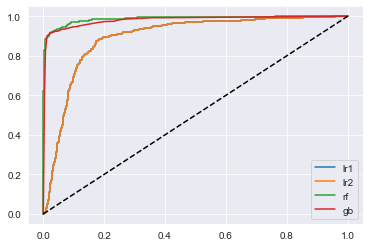

In [120]:
# Plot a ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fpr2, tpr2, thresholds = roc_curve(y_test, y2_proba)
fpr3, tpr3, thresholds = roc_curve(y_test, y3_proba)
fpr4, tpr4, thresholds = roc_curve(y_test, y4_proba)

plt.plot(fpr, tpr, label= 'lr1')
plt.plot(fpr2, tpr2, label = 'lr2')
plt.plot(fpr3, tpr3, label = 'rf')
plt.plot(fpr4, tpr4, label = 'gb')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')
plt.show()


####  As we can see, the area under curve is maximum for the Random Forest classifer.

In [107]:
print('Logistic Regression L1:',np.round(roc_auc_score(y_test, y_proba),3))
print('Logistic Regression L2:',np.round(roc_auc_score(y_test, y2_proba),3))
print('Random Forest:',np.round(roc_auc_score(y_test, y3_proba),3))
print('Gradient Boosting:',np.round(roc_auc_score(y_test, y4_proba),3))

Logistic Regression L1: 0.893
Logistic Regression L2: 0.893
Random Forest: 0.987
Gradient Boosting: 0.98


#### Also, the AUROC score is maximum for the Random Forest Classifer.

# In this case Random Forest classifer is our clear WINNER!